## Lineaarisen regression oletukset Pythonilla

Lineaarisessa regressiossa pyritään kuvaamaan muuttujan (ns. riippuva muuttuja y) riippuvuutta toisesta muuttujasta (riippumaton muuttuja x). Lineaarinen kuvaa yksinkertaisinta matemaattista mallia, lineaarista mallia, jota kuvataan suoran yhtälöllä y = k*x + b. Yhtälössä riippuvan muuttujan y arvo määräytyy riippumattoman muuttujan x arvosta jollain säännöllä, johon vaikuttavat suoran kulmakerroin k ja vakio b.

Niin yksinkertainen kuin suoran yhtälö onkin, lineaarinen regressio on yksi tavallisimpia tilastotieteen ja data-analytiikan ennustusmalleja.

Tämän artikkelin tarkoituksena on käydä läpi lineaarisen regression oletukset, oletukset, joiden tulee täyttyä jotta lineaarista regressiota on mielekästä käyttää.

Lineaarista regressiota sovellettaessa seuraavien viiden oletuksen on oltava voimassa:
<ul>
    <li>Muuttujien välillä tulee olla lineaarinen riippuvuus.</li>
    <li>Kaikki muuttujat ovat normaalijakautuneet.</li>
    <li>Multikollineaarisuutta ei ole tai on korkeintaan hyvin vähän.</li>
    <li>Autokorrelaatiota ei ole tai sitä on vain vähän.</li>
    <li>Data on homoskedastinen eli jokaisella muuttujalla on sama äärellinen varianssi.</li>
</ul>

### Lineaarinen riippuvuus

Nimensä mukaisesti lineaarisessa regressiossa pyritään löytämään lineaarinen yhteys riippumattoman muuttujan x ja riippuvan muuttujan y välille. Lineaarinen yhteys nähdään hajontakuviosta. 

Seuraavassa esimerkissä käyteään Pythonin <em>sklearn</em>-kirjastoa, jonka <em>make_regression</em>-funktio generoi tarkasteltavan datajoukon. Vastaavasti <em>matplotlib</em>-kirjaston avulla tehdään hajontakuvio, josta päätellään lineaarisen yhteyden olemassaolo.

Tuodaan tarvittavat kirjastot

In [1]:

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

from sklearn.datasets import make_regression

Luodaan seuraavaksi datajoukko sklearnin make_regression-funktion avulla. Seuraavassa pidetään <em>kohina</em>parametri (noise) alhaisena, jotta datajoukko seuraa lineaarista riippuvuutta. Kohinaparametri määrittää datajoukon keskihajonnan. Lopuksi piirretään muuttujat x1 ja y1 matplotlibin <em>plot</em>-funktiolla.

Text(0.5, 1.0, 'Lineaarinen yhteys löytyy')

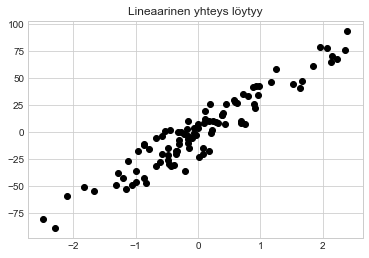

In [2]:

from sklearn.datasets import make_regression
x1, y1 = make_regression(n_samples=100, n_features=1, noise=10)

plt.plot(x1, y1, 'o', color = 'black');
plt.title("Lineaarinen yhteys löytyy")

Yllä olevassa kuviossa nähdään lineaarinen riippuvuus muuttujien x1 ja y1 välillä. Muuttujan x1 saadessa isompia arvoja myös muuttujan y1 arvo kasvaa.

Katsotaan vertailun vuoksi esimerkki epälineaarisesta riippuvuudesta, tai oikeastaan lineaarisen riippuvuuden puutteesta. Esimerkki on muuten samanlainen, mutta kohina-arvoa on suurennettu huomattavasta, seuraavassa lähes miljoonaan.

Text(0.5, 1.0, 'Lineaarinen yhteys puuttuu')

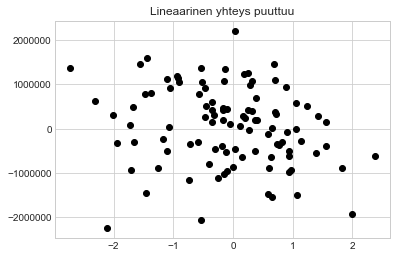

In [3]:
x1, y1 = make_regression(n_samples=100, n_features=1, noise=900000)

plt.plot(x1, y1, 'o', color = 'black');
plt.title("Lineaarinen yhteys puuttuu")

Tässä tapauksessa muuttujien x2 ja y2 välinen lineaarinen riippuvuus puuttuu. Silloin lineaarista regressiomallia ei voida hyödyntää.

### Muuttujien normaalijakautuneisuus

Toisena oletuksena on, että muuttujat ovat normaalisti jakautuneet. Tällöin jokaista x:n arvoa kohden satunnaismuuttuja y seuraa normaalijakaumaa ja sen keskiarvo on regressiosuoralla. 

Tässä päästäänkin jo asioihin, joiden taustalla oleva matematiikka on edistynyttä (vaikka sekin vielä aika vanhaa). 

Normaalijakaumaan ja sen tarkasteluun Pythonilla voi tutustua mm. seuraavista artikkeleista:

<ul>
<li><a href="https://mathworld.wolfram.com/NormalDistribution.html">MathWorld: Normal Distribution</a></li>
<li><a href="https://en.wikipedia.org/wiki/Normal_distribution">WikiPedia: Normal Distribution</li>
<li><a href="http://www.insightsbot.com/blog/WEjdW/fitting-probability-distributions-with-python-part-1">Fitting Probability Distributions with Python</li>
</ul>

Yksi varsin usein käytetty graafinen tapa normaaliuden testaamiseen on <em>Q-Q-kuvio</em>. Nimi tulee sanoista <em>Quantile-Quantile-kuvio</em>. Tässä tekniikassa verrataan kahta todennäköisyysjakaumaa visuaalisesti.

Seuraavassa esimerkissä käytetään scipy-kirjaston <em>probplot</em>-funktiota Q-Q-kuvion tekemiseen. Siinä verrataan valitsemamme muuttujan jakaumaa normaalijakaumaan.

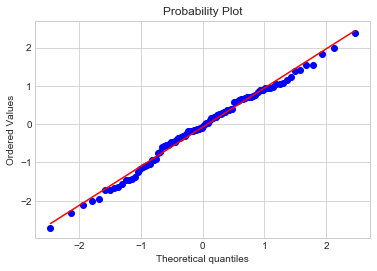

In [4]:
import scipy.stats as stats

stats.probplot(x1[:,0], dist="norm", plot=plt)
plt.show()

Mistä tästä sitten tiedetään, että muuttuja x1 seuraa normaalijakaumaa? Normaalissa jakaumassa kaikkien pisteiden tulee olla punaisen viivan päällä. Tässä näin on, muutamaa poikkeusta lukuun ottamatta. Poikkeukset johtuvat pienestä otoskoosta. Käytännössä analysoija päättää, kuinka tarkka tässä asiassa tulee olla.

### Multikollineaarisuus, tai mieluiten sen puute

Multikollineaarisuus tarkoittaa, että riippumattomattomat muuttujat korreloivat vahvasti keskenään. Muuttujia x kutsutaan riippumattomiksi ihan syystä. Jos niiden välillä on multikollineaarisuutta, ne eivät enää olekaan riippumattomia ja tästä aiheutuu ongelmia lineaarista regressiota mallinnettaessa.

Multikollineaarisuutta testataan tässäkin visuaalisesti. Seuraavassa käytetään Pythonin Pandas-kirjaston muotoiluominaisuuksuutta, jossa tietokehyksiä voi muotoilla niiden sisällön mukaan.

Luodaan siis ensimmäisen esimerkin kaltainen tietojoukko, mutta nyt se palauttaa kolme x-muuttujaa. Muutetaan se array-taulukoksi Pandaksen tietokehyksessä ja käytetään <em>corr</em>-funktiota sarakemuuttujien keskinäisen korrelaation laskemiseen.

In [5]:
#### Luodaan esimerkkitietojoukko, jossa on x-esiintymää
x3, y3 = make_regression(n_samples=100, n_features=3, noise=20)

#### Muunnetaan nämä Pandaksen tietokehykseen
import pandas as pd
df = pd.DataFrame(x3)
df.columns = ['x1', 'x2', 'x3']

#### Tehdään vielä korrelaatiomatriisi
corr = df.corr()

Korrelaatiomatriisi on tallennettu muuttujaan <em>corr</em>. Tähän muuttujaan voidaan nyt soveltaa <em>coolwarm</em>-värikarttaa. Pienet arvot saavat tässä sinisen värin ja isommat arvot tulevat kuumemmiksi ja siis punaisiksi.

In [6]:
corr.style.background_gradient(cmap='coolwarm')

,x1,x2,x3
x1,1.000000,-0.110037,0.057945
x2,-0.110037,1.000000,0.025335
x3,0.057945,0.025335,1.000000


Mikäli minkä tahansa kahden eri muuttujan korrelaatiokertoimen itseisarvo on vähintään 0,8, oletus multikollineaarisuuden vähäisyydestä ei täyty. Tällöin lineaarista regressiomallia ei siis voida soveltaa.

### Autokorrelaatiota esiintyy korkeintaan vähän

Tämä oletus on edellisen kaltainen, mutta se soveltuu lineaarisen regressiomallin jäännöstermeihin. Ensin on siis luotava lineaaregresiomalli, jotta autokorrelaation suuruus voidaan tarkistaa.

### Homoskedastisuus eli vakiovarianssisuus

Homoskedastisuus tarkoittaa vakiovarianssisuutta. Muuttujalla on silloin vakion suuruinen varianssi, joka ei muutu muuttujan arvojen muuttuessa. Se voidaan määritellä $E(\mu_i^2)=\sigma^2$. Heteroskedastisuudessa (varianssi ei ole vakio) vastaava määritelmä olisi $E(\mu_i^2)=\sigma_i^2$. 

Homoskedastisuuden analysointi kohdistetaan sekin autokorrelaation tavoin lineaarisen regressiomallin jäännösarvoihin. Sitä testataan visuaalisesti jäännöstermien hajontakuviosta. Lineaarinen regressiomalli on sovelluskelpoinen, jos jäännöstermien virhetermien varianssi on vakio eli ne ovat homoskedastisia. 

Mallissa on homoskedastisuutta, jos sen <em>kohina</em> on <em>satunnaista</em> ja samankaltaista kaikilla muuttujilla. Mikäli jäännöstermien hajontakuviota katsomalla on nähtävissä jonkinlainen kuvio tai säännönmukaisuus, homoskedastisuuden oletus ei täyty.

### Lopuksi

Tässä artikkelissa käytiin Python-ohjelmaa hyödyntäen läpi viisi lineaarisen regressiomallin edellytystä, joiden tulee täyttyä jotta sellaista mallia on mielekästä soveltaa. Näistä oletuksista kolme ensimmäistä tulee tarkistaa ennen mallin regressiomallin tekemistä ja kaksi viimeistä regressioanalyysin jälkeen. 

Tämä artikkeli pohjautuu seuraaviin lähteisiin.

#### Lähteet

<ul>
<li><a href="http://www.insightsbot.com/assumptions-of-linear-regression-with-python/">Assumptions of Linear Regression with Python</a></li>

<li><a href="https://www.reddit.com/r/learnmachinelearning/comments/byx9ez/the_four_assumptions_of_regression/">The four assumptions of regression</a></li>
</ul>

### Testataan tätä Koneen osakkeeseen

Testataan yllä olevia oppeja konkreettiseen tilanteeseen.

Seuraavassa on indeksin OMX Helsinki 25 arvot vuoden 2015 alusta vuoden 2020 huhtikuun loppuun ja Kone Oyj:n osakkeen arvot samalta ajalta omissa csv-tiedostoissa.

Luetaan ne tietokehyksiin ja tehdään tarvittavat alkuvalmistelut.

In [7]:
#Avataan tiedostot
osake = pd.read_csv('http://www.haaga-helia.fi/~fie8lh101/Dataa/KoneOyj-2015-0101-2020-0430.csv', sep = ';', decimal = ',', usecols = [0,1,2,3,4,5,6,7,8,9,10], skiprows=1)
markkinat = pd.read_csv('http://www.haaga-helia.fi/~fie8lh101/Dataa/OMXH25-2015-0101-2020-0430.csv', sep = ';', decimal = ',', usecols = [0,1,2,3], skiprows=1)

#Lisätään aikaleimat
osake.index = pd.to_datetime(osake['Date'], dayfirst=True)
markkinat.index = pd.to_datetime(markkinat['Date'], dayfirst=True)

#Järjestetään aikasarja vanhimmasta uusimpaan
osake.sort_index(inplace = True)
markkinat.sort_index(inplace = True)


In [8]:
#### Tutustutaan dataan

osake.head()

,Date,Bid,Ask,Opening price,High price,Low price,Closing price,Average price,Total volume,Turnover,Trades
Date,,,,,,,,,,,
2015-01-02,2015-01-02,37.57,37.60,37.80,38.00,37.50,37.59,37.776,501338,18939399.47,3106
2015-01-05,2015-01-05,37.26,37.27,37.51,37.89,37.18,37.27,37.459,454778,17035392.08,2922
2015-01-07,2015-01-07,36.95,36.97,37.00,37.43,36.46,36.95,36.962,1041725,38507224.60,4543
2015-01-08,2015-01-08,37.19,37.23,37.40,37.40,36.70,37.23,37.073,776090,28771838.50,4241
2015-01-09,2015-01-09,36.97,36.98,37.18,37.61,36.92,36.97,37.166,656689,24406700.30,3213


In [9]:
#### Tutustutaan dataan

markkinat.head()

,Date,Highprice,Lowprice,Closingprice
Date,,,,
2015-01-02,2015-01-02,"3,022.43","2,993.02","3,007.11"
2015-01-05,2015-01-05,"3,023.03","2,947.22","2,947.53"
2015-01-07,2015-01-07,"2,961.35","2,920.84","2,929.82"
2015-01-08,2015-01-08,"2,986.39","2,952.31","2,985.03"
2015-01-09,2015-01-09,"3,001.76","2,958.82","2,968.38"


#### Lineaarinen riippuvuus

Tarkastellaan seuraavaksi markkinaindeksin ja osakkeiden tuoton lineaarisuutta yllä olevan mukaisesti.

In [10]:
#### Luetaan x-muuttujan arvot ja y-muuttujan arvot

x_markkinat = markkinat['Closingprice']
y_osake = osake['Closing price']

Text(0.5, 1.0, 'Markkinaindeksin ja osakkeen arvon yhteys')

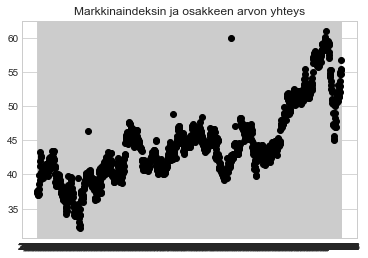

In [11]:
plt.plot(x_markkinat, y_osake, 'o', color = 'black');
plt.title("Markkinaindeksin ja osakkeen arvon yhteys")

Mitä mieltä olet, onko muuttujien välillä lineaarinen yhteys?

#### Normaalijakautuneisuus

Tarkistetaan seuraavaksi normaalijakautuneisuus

In [27]:
stats.probplot(x_markkinat[:], dist="norm", plot=plt)
plt.show()

TypeError: unsupported operand type(s) for /: 'str' and 'int'

In [28]:
x_markkinat[:3]

Date
2015-01-02    3,007.11
2015-01-05    2,947.53
2015-01-07    2,929.82
Name: Closingprice, dtype: object